<a href="https://colab.research.google.com/github/2303a51477/2303a51477/blob/main/2303a51477_b_no_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predication of obealty levels based on eating habits
1.identify the top 5 reasons for obesity level
2.identify the age group with most obestiy
3.find the max and min weight of patient with obesity
4.name the top5 eating habits contribution to obesity
5.identify the highest usage of the tech gad gets
among obese patents
6.apply either classification models or clustering model to evaluate the dataset

Top 5 reasons for obesity levels:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
Age group with most obesity: (20, 30]
Max weight of obese patients: 173.0
Min weight of obese patients: 75.0
Top 5 eating habits contributing to obesity:
FAVC
yes    1866
no      245
Name: count, dtype: int64
Highest usage of tech gadgets among obese patients:
MTRANS
Public_Transportation    759
Name: count, dtype: int64


<ipython-input-1-5ba829731dcc>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = data.groupby(pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70])).size()


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.92        86
      Normal_Weight       0.86      0.85      0.85        93
     Obesity_Type_I       0.97      0.94      0.96       102
    Obesity_Type_II       0.99      0.97      0.98        88
   Obesity_Type_III       0.98      1.00      0.99        98
 Overweight_Level_I       0.86      0.92      0.89        88
Overweight_Level_II       0.94      0.92      0.93        79

           accuracy                           0.93       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.93      0.93      0.93       634



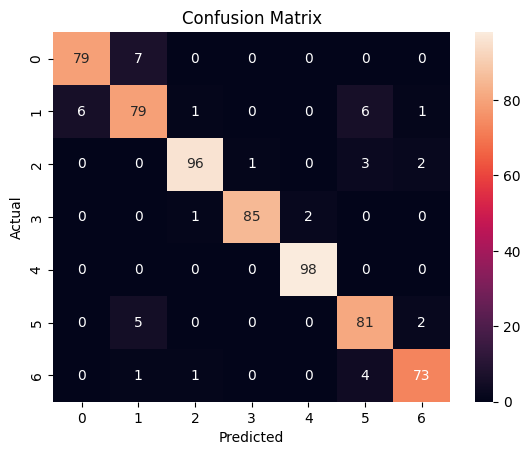

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1. Identify the top 5 reasons for obesity levels
top_reasons = data['family_history_with_overweight'].value_counts().nlargest(5)
print("Top 5 reasons for obesity levels:")
print(top_reasons)

# 2. Identify the age group with most obesity
age_group = data.groupby(pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70])).size()
most_obese_age_group = age_group.idxmax()
print(f"Age group with most obesity: {most_obese_age_group}")

# 3. Find the max and min weight of patients with obesity
max_weight = data[data['NObeyesdad'].str.contains('Obesity')]['Weight'].max()
min_weight = data[data['NObeyesdad'].str.contains('Obesity')]['Weight'].min()
print(f"Max weight of obese patients: {max_weight}")
print(f"Min weight of obese patients: {min_weight}")

# 4. Name the top 5 eating habits contributing to obesity
top_eating_habits = data['FAVC'].value_counts().nlargest(5)
print("Top 5 eating habits contributing to obesity:")
print(top_eating_habits)

# 5. Identify the highest usage of tech gadgets among obese patients
tech_usage = data[data['NObeyesdad'].str.contains('Obesity')]['MTRANS'].value_counts().nlargest(1)
print("Highest usage of tech gadgets among obese patients:")
print(tech_usage)

# 6. Apply a classification model to evaluate the dataset
# Prepare data for classification
X = data[['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC']]
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
y = data['NObeyesdad']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()